In [1]:
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)
from keras.backend.tensorflow_backend import set_session
set_session(tf.Session(config=config))
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
 

Using TensorFlow backend.


In [2]:
dogs=pd.read_csv("/home/ramreddyy/Documents/dog_breed/labels.csv")


In [3]:
a1=dogs['breed'].value_counts().index.tolist()


In [4]:
from keras.preprocessing import image
def load(inpx,inpy):
    x=[]
    y=[]
    for i in range(inpx.shape[0]):
        if inpx.iloc[i][1] in a1[:5]:
            imgg=image.load_img("/home/ramreddyy/Documents/dog_breed/train/"+inpx.iloc[i][0]+".jpg",target_size=(224,224))
            arr=image.img_to_array(imgg)
            x.append(arr/255)
            y.append(inpy.iloc[i][0])
    x=np.asarray(x)
    y=np.asarray(y)
    targets_series = pd.Series(y)
    one_hot = pd.get_dummies(targets_series, sparse = True)
    one_hot_labels = np.asarray(one_hot)
    return x,one_hot_labels
a,y=load(inpx=dogs,inpy=dogs.breed)


In [5]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in sss.split(a,y):
    x_train, x_test = a[train_index], a[test_index]
    y_train, y_test = y[train_index], y[test_index]
def createModel():
    
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(224,224,3)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.1))
 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.1))
 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(5, activation='softmax'))
     
    return model

In [12]:
from keras.preprocessing.image import ImageDataGenerator
model2 = createModel()
 
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
save=keras.callbacks.ModelCheckpoint('/home/ramreddyy/model_save', monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)
tensor=keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=0, batch_size=32, write_graph=True, write_grads=False, write_images=False, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None)

batch_size = 64
epochs = 200
datagen = ImageDataGenerator(
                            zoom_range=0.2,
                            rotation_range=30,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            horizontal_flip=True,
                            vertical_flip=False) 

history2 = model2.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                              steps_per_epoch=int(np.ceil(x_train.shape[0] / float(batch_size))),
                              epochs=epochs,
                              validation_data=(x_test, y_test),
                              workers=4,
                               callbacks=[save,tensor])
 


Epoch 1/200
8/8 [==============================] - 6s 736ms/step - loss: 1.6470 - acc: 0.2236 - val_loss: 1.6076 - val_acc: 0.2119
Epoch 2/200
8/8 [==============================] - 5s 598ms/step - loss: 1.6048 - acc: 0.2737 - val_loss: 1.5768 - val_acc: 0.3983
Epoch 3/200
8/8 [==============================] - 3s 365ms/step - loss: 1.5761 - acc: 0.2709 - val_loss: 1.6063 - val_acc: 0.1949
Epoch 4/200
8/8 [==============================] - 6s 719ms/step - loss: 1.5568 - acc: 0.2921 - val_loss: 1.5083 - val_acc: 0.2966
Epoch 5/200
8/8 [==============================] - 5s 651ms/step - loss: 1.4759 - acc: 0.4046 - val_loss: 1.4316 - val_acc: 0.3729
Epoch 6/200
8/8 [==============================] - 5s 660ms/step - loss: 1.4215 - acc: 0.4033 - val_loss: 1.3556 - val_acc: 0.3898
Epoch 7/200
8/8 [==============================] - 6s 688ms/step - loss: 1.2486 - acc: 0.4830 - val_loss: 1.2838 - val_acc: 0.4237
Epoch 8/200
8/8 [==============================] - 5s 620ms/step - loss: 1.2930 - a

8/8 [==============================] - 3s 335ms/step - loss: 0.5587 - acc: 0.7829 - val_loss: 1.0603 - val_acc: 0.6271
Epoch 64/200
8/8 [==============================] - 3s 361ms/step - loss: 0.5849 - acc: 0.7618 - val_loss: 1.1216 - val_acc: 0.6102
Epoch 65/200
8/8 [==============================] - 3s 340ms/step - loss: 0.6131 - acc: 0.7605 - val_loss: 1.1106 - val_acc: 0.6102
Epoch 66/200
8/8 [==============================] - 3s 339ms/step - loss: 0.5759 - acc: 0.7638 - val_loss: 1.0214 - val_acc: 0.6186
Epoch 67/200
8/8 [==============================] - 3s 336ms/step - loss: 0.5064 - acc: 0.7980 - val_loss: 1.1073 - val_acc: 0.6102
Epoch 68/200
8/8 [==============================] - 3s 390ms/step - loss: 0.5531 - acc: 0.7908 - val_loss: 1.0974 - val_acc: 0.6017
Epoch 69/200
8/8 [==============================] - 3s 339ms/step - loss: 0.4900 - acc: 0.7829 - val_loss: 1.3422 - val_acc: 0.5847
Epoch 70/200
8/8 [==============================] - 3s 339ms/step - loss: 0.6209 - acc: 0

Epoch 125/200
8/8 [==============================] - 3s 332ms/step - loss: 0.2521 - acc: 0.9125 - val_loss: 1.1119 - val_acc: 0.6780
Epoch 126/200
8/8 [==============================] - 3s 344ms/step - loss: 0.3139 - acc: 0.8974 - val_loss: 1.2779 - val_acc: 0.6271
Epoch 127/200
8/8 [==============================] - 3s 344ms/step - loss: 0.3724 - acc: 0.8467 - val_loss: 1.1281 - val_acc: 0.6525
Epoch 128/200
8/8 [==============================] - 3s 342ms/step - loss: 0.3780 - acc: 0.8626 - val_loss: 1.1053 - val_acc: 0.6610
Epoch 129/200
8/8 [==============================] - 3s 340ms/step - loss: 0.3316 - acc: 0.8895 - val_loss: 1.0627 - val_acc: 0.6780
Epoch 130/200
8/8 [==============================] - 3s 361ms/step - loss: 0.2564 - acc: 0.9184 - val_loss: 1.1283 - val_acc: 0.7034
Epoch 131/200
8/8 [==============================] - 3s 349ms/step - loss: 0.2152 - acc: 0.9099 - val_loss: 1.2349 - val_acc: 0.6864
Epoch 132/200
8/8 [==============================] - 3s 340ms/step - 

8/8 [==============================] - 3s 345ms/step - loss: 0.1500 - acc: 0.9375 - val_loss: 1.2288 - val_acc: 0.7119
Epoch 187/200
8/8 [==============================] - 3s 362ms/step - loss: 0.1416 - acc: 0.9434 - val_loss: 1.2974 - val_acc: 0.7119
Epoch 188/200
8/8 [==============================] - 3s 325ms/step - loss: 0.1598 - acc: 0.9375 - val_loss: 1.2343 - val_acc: 0.6780
Epoch 189/200
8/8 [==============================] - 3s 349ms/step - loss: 0.1442 - acc: 0.9553 - val_loss: 1.1827 - val_acc: 0.6864
Epoch 190/200
8/8 [==============================] - 3s 338ms/step - loss: 0.1107 - acc: 0.9586 - val_loss: 1.3154 - val_acc: 0.7203
Epoch 191/200
8/8 [==============================] - 3s 337ms/step - loss: 0.1282 - acc: 0.9553 - val_loss: 1.4484 - val_acc: 0.7119
Epoch 192/200
8/8 [==============================] - 3s 340ms/step - loss: 0.1980 - acc: 0.9204 - val_loss: 1.4839 - val_acc: 0.7119
Epoch 193/200
8/8 [==============================] - 3s 341ms/step - loss: 0.1986 -

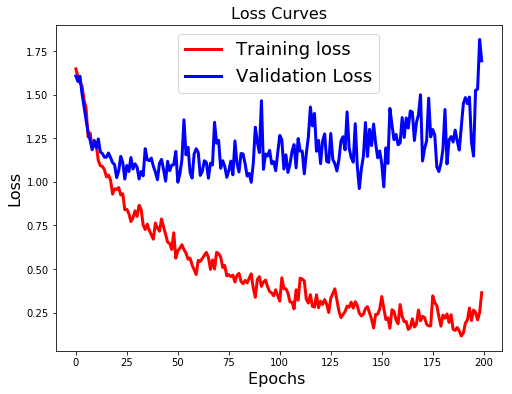

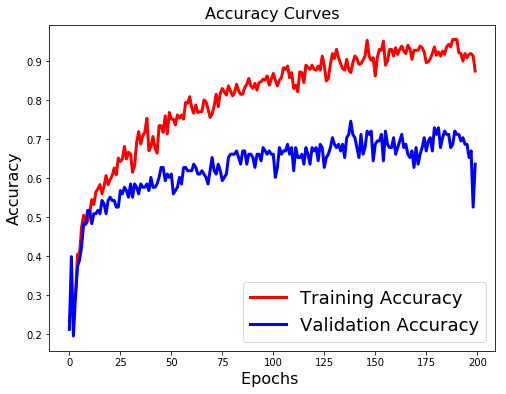

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=[8,6])
plt.plot(history2.history['loss'],'r',linewidth=3.0)
plt.plot(history2.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)


plt.figure(figsize=[8,6])
plt.plot(history2.history['acc'],'r',linewidth=3.0)
plt.plot(history2.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)
plt.show()